# 两个小测试

In [3]:
import pandas as pd

array1 = [1, 2, 3, 4, 5]
array2 = [6, 7, 8, 9, 10]
array3 = [11, 12, 13, 14, 15]
array4 = [16, 17, 18, 19, 20]
array5 = ["class_{}".format(i) for i in array1]

df = pd.DataFrame({'Array1': array1, 'Array 2': array2, 'Array 3': array3, 'Array 4': array4, 'Array 5': array5})
df.to_csv('output.csv', index=False)

In [6]:
import pandas as pd
array1 = [1,2,3,4,5]
imgh= []
array = [{'name': 'Alice', 'age': 25, 'gender': 'F'}, {'name': 'Bob', 'age': 30, 'gender': 'M'}, {'name': 'Charlie', 'age': 35, 'gender': 'M'}, {'name': 'David', 'age': 40, 'gender': 'M'}, {'name': 'Eve', 'age': 45, 'gender': 'F'}]
for i in range(len(array1)):
    img_pre_dick = {}
    img_pre_dick['P_class'] = "class_{}".format(array1[i]) 
    imgh.append(img_pre_dick)

df1 = pd.DataFrame(array)
df2 = pd.DataFrame(imgh)
df = pd.concat([df1, df2],axis=1)
df.to_csv('output.csv', index=False)

# 正式开始数据统计和评估

In [17]:
import pandas as pd
import numpy as np


In [18]:
df = pd.read_csv('all_output.csv')
classs = ['class_{}'.format(i) for i in range(5)]
print(df)
 

              id  R_class  P_class      Prob  spot_on     class_0_p  \
0     121196.jpg  class_0  class_0  1.000000        1  9.999998e-01   
1     124977.jpg  class_0  class_0  0.866389        1  8.663895e-01   
2     139821.jpg  class_0  class_0  0.999999        1  9.999994e-01   
3     151220.jpg  class_0  class_0  1.000000        1  1.000000e+00   
4     167426.jpg  class_0  class_3  0.834536        0  1.654594e-01   
...          ...      ...      ...       ...      ...           ...   
5750  995771.jpg  class_4  class_4  0.999999        1  2.505779e-10   
5751  995993.jpg  class_4  class_4  1.000000        1  6.846556e-12   
5752  997133.jpg  class_4  class_4  1.000000        1  1.554379e-11   
5753  998077.jpg  class_4  class_4  1.000000        1  1.825839e-11   
5754  999875.jpg  class_4  class_3  0.980812        0  5.105289e-04   

         class_1_p     class_2_p     class_3_p     class_4_p  
0     3.406595e-12  3.032670e-11  2.087057e-07  1.336925e-12  
1     4.168208e-05  8

准确率评估

In [19]:
sum(df['R_class'] == df['P_class'])/len(df)

0.9313640312771503

## 各类别准确率评估指标
- maro avg宏平均：直接对每一类的评估指标求平均
- weighted avg加权平均：按照样本数量（support）加权计算指标平均值

In [20]:
from sklearn.metrics import classification_report
print(classification_report(df['R_class'],df['P_class'],target_names=classs))

              precision    recall  f1-score   support

     class_0       0.78      0.67      0.72       114
     class_1       0.88      0.92      0.90      1613
     class_2       0.92      0.90      0.91      1687
     class_3       0.96      0.96      0.96       780
     class_4       0.99      0.98      0.98      1561

    accuracy                           0.93      5755
   macro avg       0.91      0.89      0.90      5755
weighted avg       0.93      0.93      0.93      5755



In [23]:
report = classification_report(df['R_class'],df['P_class'],target_names=classs,output_dict=True)
del report['accuracy']
df1 = pd.DataFrame(report).transpose()
df1.to_csv('各类别准确率评估指标.csv',index_label = '类别')
print(df1)

              precision    recall  f1-score  support
class_0        0.783505  0.666667  0.720379    114.0
class_1        0.881276  0.924985  0.902601   1613.0
class_2        0.924863  0.897451  0.910951   1687.0
class_3        0.955527  0.964103  0.959796    780.0
class_4        0.990266  0.977578  0.983881   1561.0
macro avg      0.907087  0.886157  0.895522   5755.0
weighted avg   0.931742  0.931364  0.931238   5755.0


# 混淆矩阵

In [32]:
import matplotlib
matplotlib.rc("font", family = "SimHei")
import matplotlib.pyplot as plt

import pandas as pd
import math
import cv2
import numpy as np
import tqdm as tqdm

In [33]:
df2 = pd.read_csv('all_output.csv')
df2.head()

,id,R_class,P_class,Prob,spot_on,class_0_p,class_1_p,class_2_p,class_3_p,class_4_p
0,121196.jpg,class_0,class_0,1.000000,1,1.000000,3.406595e-12,3.032670e-11,2.087057e-07,1.336925e-12
1,124977.jpg,class_0,class_0,0.866389,1,0.866389,4.168208e-05,8.731536e-07,9.225593e-02,4.131204e-02
2,139821.jpg,class_0,class_0,0.999999,1,0.999999,4.348530e-07,2.987354e-12,1.306152e-07,4.040849e-12
3,151220.jpg,class_0,class_0,1.000000,1,1.000000,6.816909e-09,1.866647e-11,6.824984e-10,2.441567e-13
4,167426.jpg,class_0,class_3,0.834536,0,0.165459,8.967808e-08,4.322787e-06,8.345357e-01,4.960551e-07


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(df2['R_class'], df2['P_class'])
confusion_matrix_model.shape
confusion_matrix_model

array([[  76,    7,    0,   30,    1],
       [   0, 1492,  109,    0,   12],
       [   0,  171, 1514,    0,    2],
       [  21,    7,    0,  752,    0],
       [   0,   16,   14,    5, 1526]], dtype=int64)

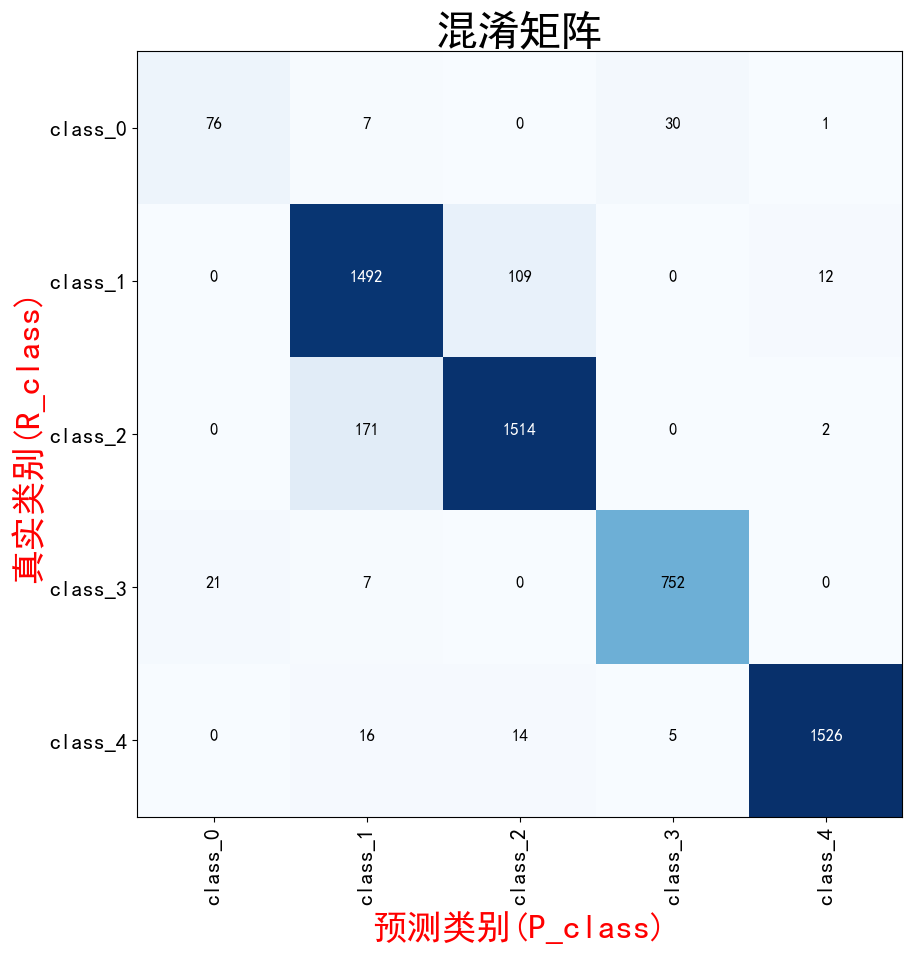

In [35]:
import itertools
def cnf_matrix(cm,classes,cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    tick_marks = np.arange(len(classs))

    plt.title('混淆矩阵', fontsize=30)
    plt.xlabel('预测类别(P_class)',fontsize=25,c='r')
    plt.ylabel('真实类别(R_class)',fontsize=25,c='r')
    plt.tick_params(labelsize=16)
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thershold = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = "white" if cm[i,j] > thershold else "black",
                 fontsize = 12)
    plt.tight_layout()

    plt.show()
cnf_matrix(confusion_matrix_model, classs,cmap='Blues')


In [ ]:
orr_R ='class_1'
orr_P ='class_2'
df_orr1_2 = df2[(df2['R_class']==orr_R) & (df2['P_class']==orr_P)]
print(df_orr1_2)
df_orr2_1 = df2[(df2['R_class']==orr_P) & (df2['P_class']==orr_R)]
print(df_orr2_1)

# PR曲线绘制

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
df.head()


,id,R_class,P_class,Prob,spot_on,class_0_p,class_1_p,class_2_p,class_3_p,class_4_p
0,121196.jpg,class_0,class_0,1.000000,1,1.000000,3.406595e-12,3.032670e-11,2.087057e-07,1.336925e-12
1,124977.jpg,class_0,class_0,0.866389,1,0.866389,4.168208e-05,8.731536e-07,9.225593e-02,4.131204e-02
2,139821.jpg,class_0,class_0,0.999999,1,0.999999,4.348530e-07,2.987354e-12,1.306152e-07,4.040849e-12
3,151220.jpg,class_0,class_0,1.000000,1,1.000000,6.816909e-09,1.866647e-11,6.824984e-10,2.441567e-13
4,167426.jpg,class_0,class_3,0.834536,0,0.165459,8.967808e-08,4.322787e-06,8.345357e-01,4.960551e-07


In [49]:
specific_class = 'class_0'

y_test = (df['R_class'] == specific_class)
y_score = df['class_0_p']

precision, recall, thresholds =precision_recall_curve(y_test, y_score)
AP = average_precision_score(y_test, y_score,average='weighted')
print(AP)


0.7949191549195863


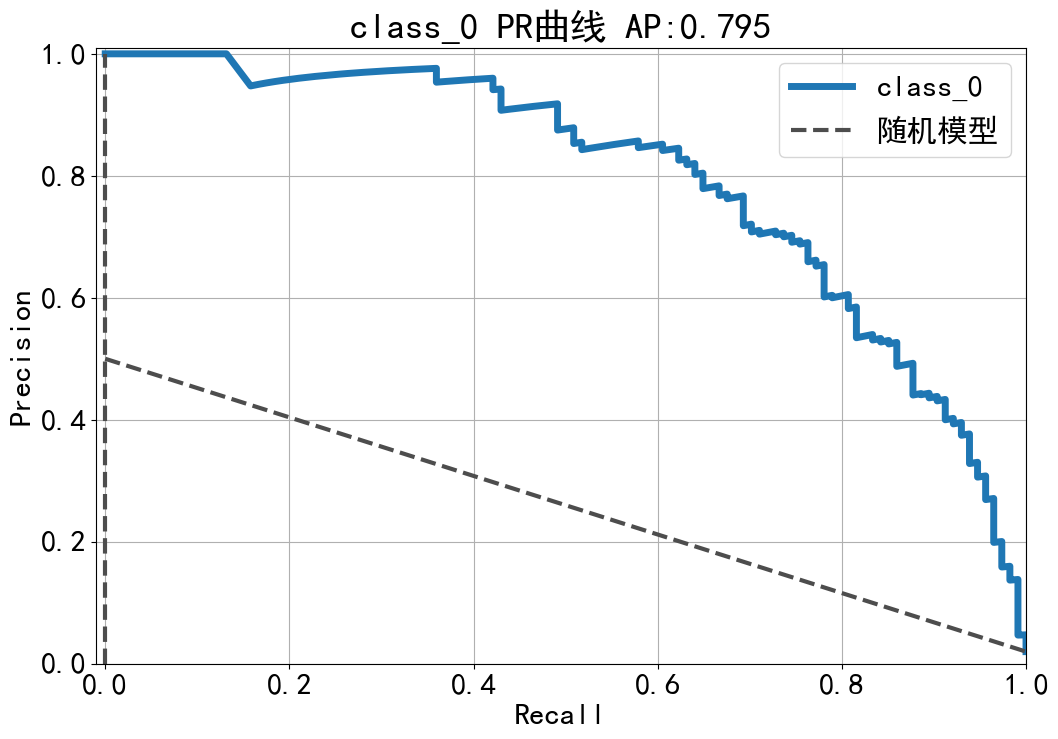

In [50]:
plt.figure(figsize=(12,8))
plt.plot(recall, precision, linewidth = 5,label = specific_class)
plt.plot([0,0],[0,1],ls = "--",c='.3',linewidth = 3,label = '随机模型')
plt.plot([0,1],[0.5, sum(y_test==1)/len(df)], ls = "--",c='.3',linewidth = 3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线 AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from matplotlib import colors as mcolors
import random 
random.seed(124)
colors = ['b','g','r','c','m']
markers = [".","o","v","^","1"]
linestyle = ['--','-.','-']

def get_line_arg():
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 3)
    return line_arg

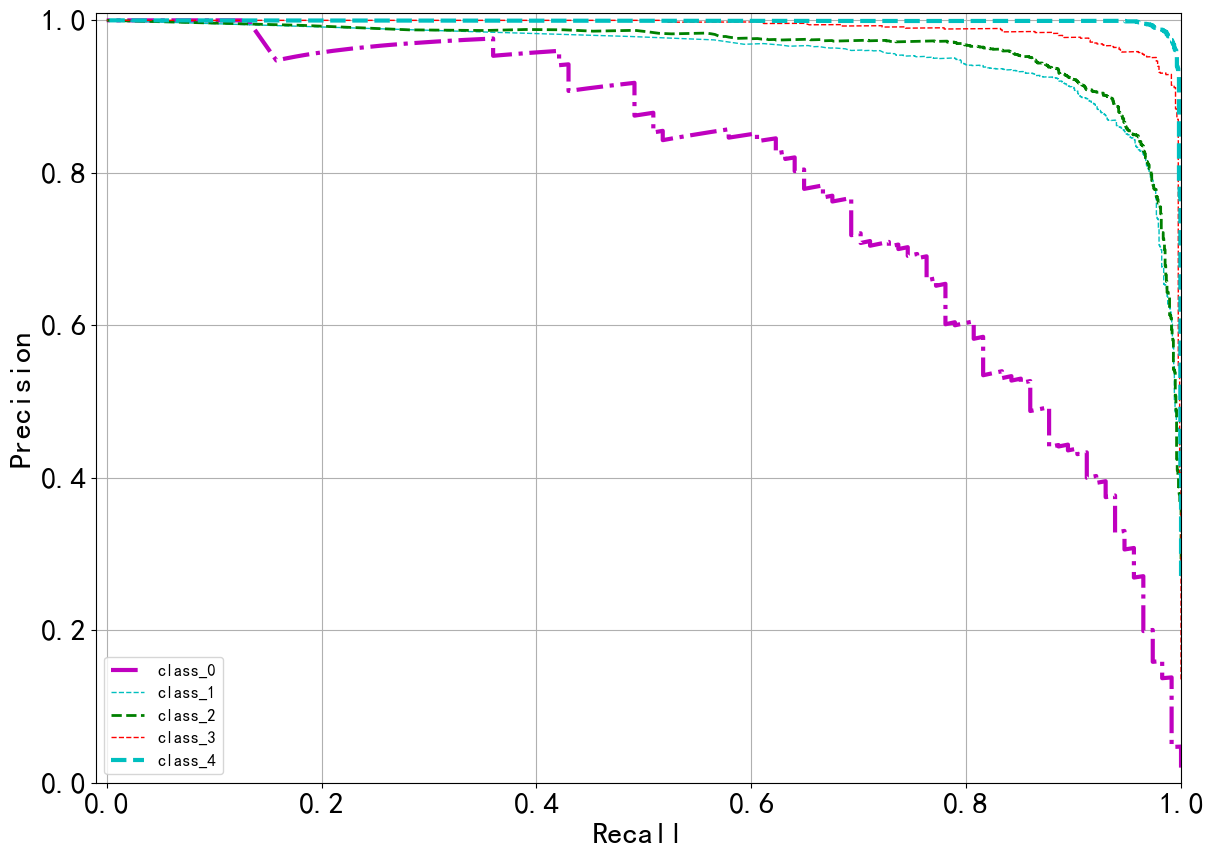

In [59]:
plt.figure(figsize=(14,10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)
ap_list = []
for each_class in classs :
    y_test = list((df['R_class'] == each_class))
    y_score = list(df['{}_p'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall,precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)


plt.legend(loc = 'best', fontsize = 12)

plt.show()

In [53]:
df_report = pd.read_csv('各类别准确率评估指标.csv')
marco_avg_auc = np.mean(ap_list)
weighted_avg_auc = sum(ap_list*df_report.iloc[:-2]['support']/len(df))

ap_list.append(marco_avg_auc)
ap_list.append(weighted_avg_auc)

df_report['AP'] = ap_list

df_report.to_csv('各类别准确率评估指标.csv', index=False)



# ROC曲线

In [54]:
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('all_output.csv')
fpr, tpr ,thresholds = roc_curve(y_test, y_score)

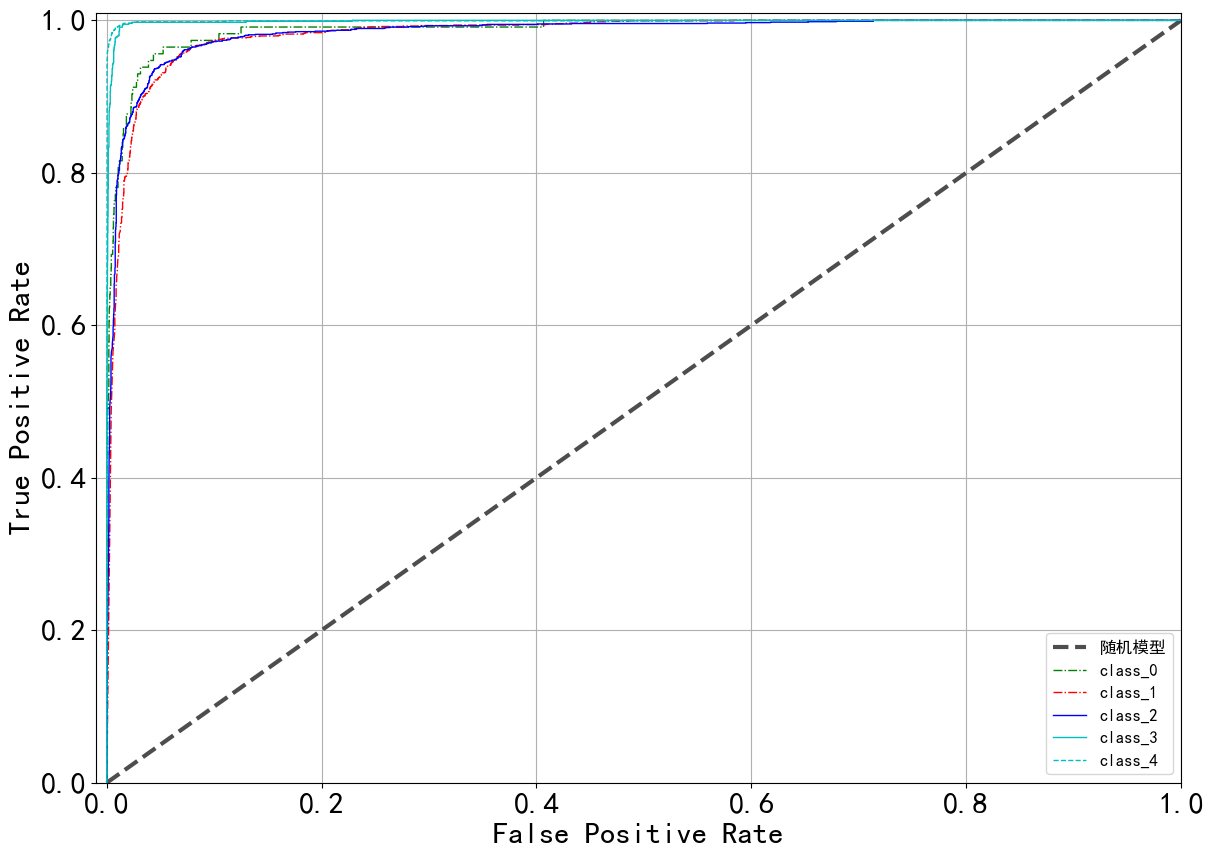

In [55]:
plt.figure(figsize = (14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0,1],[0,1],ls="--",c='.3', linewidth =3, label = '随机模型')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classs:
    y_test = list((df['R_class'] == each_class))
    y_score = list(df['{}_p'.format(each_class)])
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr,**get_line_arg(), label = each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize = 12)
plt.show()


In [56]:
df_report = pd.read_csv('各类别准确率评估指标.csv')
marco_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list*df_report.iloc[:-2]['support']/len(df))

auc_list.append(marco_avg_auc)
auc_list.append(weighted_avg_auc)

df_report['AUC'] = auc_list

df_report.to_csv('各类别准确率评估指标.csv', index=False)